In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


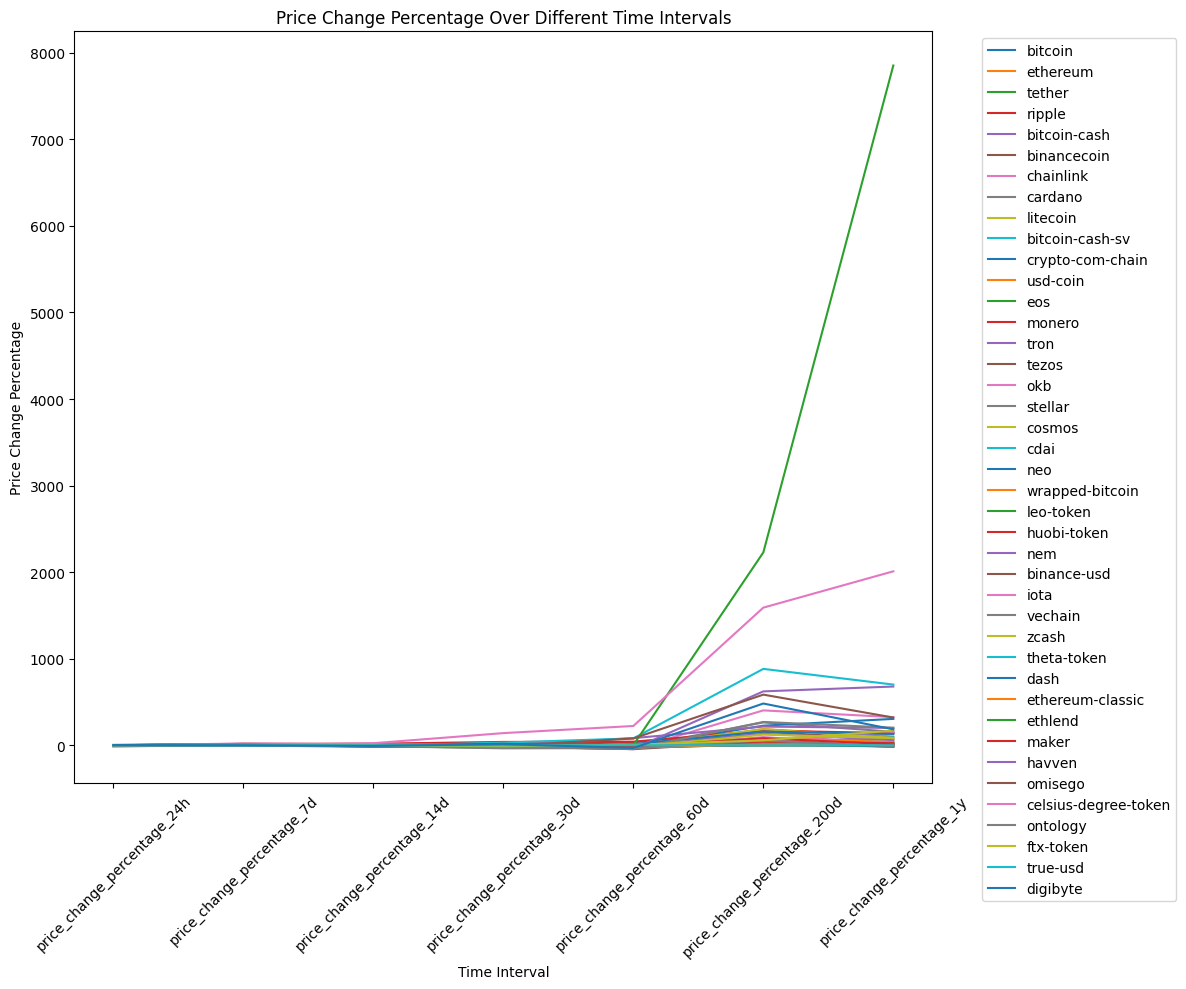

In [4]:
# Plot your data to see what's in your DataFrame
# Plot each row of the DataFrame using plt.plot
plt.figure(figsize=(12, 10))

# Iterate over each row of the DataFrame
for index, row in df_market_data.iterrows():
    plt.plot(row.index, row.values, label=index)

plt.xticks(rotation=45)
plt.xlabel('Time Interval')
plt.ylabel('Price Change Percentage')
plt.title('Price Change Percentage Over Different Time Intervals')

# Place legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original data
crypto_names = df_market_data.index.tolist()

# Set the coinid column as index
df_market_data_scaled['coin_id'] = crypto_names
df_market_data_scaled.set_index('coin_id', inplace=True)

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 11)

In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
  kmeans_model = KMeans(n_clusters=k, random_state=1)
# 2. Fit the model to the data using `df_market_data_scaled`
  kmeans_model.fit(df_market_data_scaled)
# 3. Append the model.inertia_ to the inertia list
  inertia_values.append(kmeans_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "Number of Clusters (k)": k_values,
    "Inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

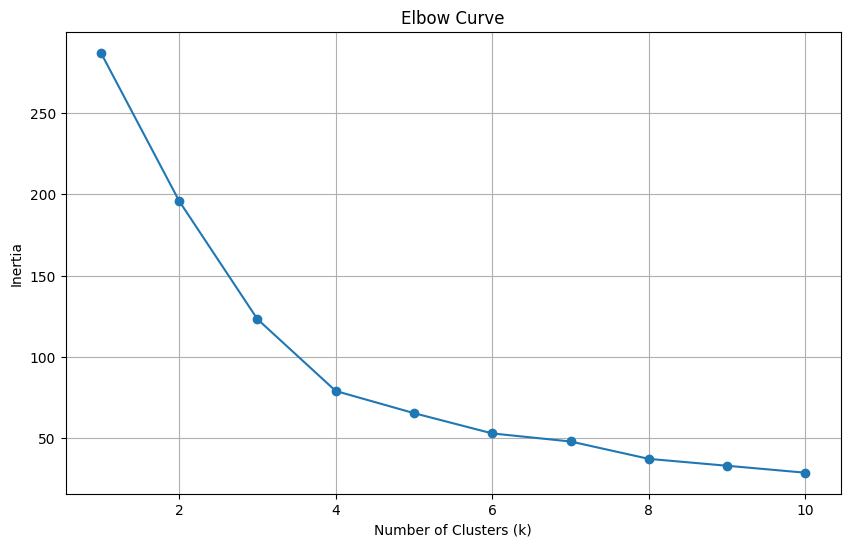

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["Number of Clusters (k)"], elbow_df["Inertia"], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4)

In [12]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [14]:
# Create a copy of the DataFrame
df_market_data_clusters = df_market_data.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_clusters['Cluster'] = clusters

# Display sample data
df_market_data_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,3


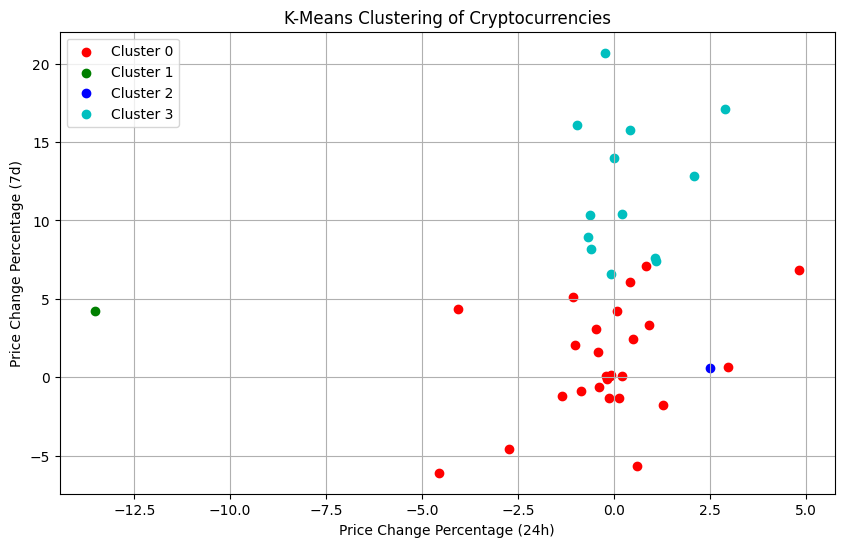

In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
# Define colors for each cluster
colors = ['r', 'g', 'b', 'c']

# Create a scatter plot using plt.scatter
plt.figure(figsize=(10, 6))
for cluster_id in range(4):
    cluster_data = df_market_data_clusters[df_market_data_clusters['Cluster'] == cluster_id]
    plt.scatter(cluster_data['price_change_percentage_24h'],
                cluster_data['price_change_percentage_7d'],
                color=colors[cluster_id],
                label=f'Cluster {cluster_id}')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.title('K-Means Clustering of Cryptocurrencies')
plt.legend()
plt.grid(True)
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
principal_components = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame.
pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3']).head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
for i, ev in enumerate(explained_variance):
    print(f"PC{i+1}: {ev:.2f}")

Explained Variance Ratio:
PC1: 0.37
PC2: 0.35
PC3: 0.18


#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.90, or 90% of the total variance in the data.

In [20]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
crypto_names = df_market_data.index.tolist()

# Set the coinid column as index
df_pca['coin_id'] = crypto_names
df_pca.set_index('coin_id', inplace=True)

# Display sample data
df_pca.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 11)

In [22]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
  kmeans_model = KMeans(n_clusters=k, random_state=1)
# 2. Fit the model to the data using `df_market_data_pca`
  kmeans_model.fit(df_pca)
# 3. Append the model.inertia_ to the inertia list
  inertia_values.append(kmeans_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "Number of Clusters (k)": k_values,
    "Inertia": inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data)

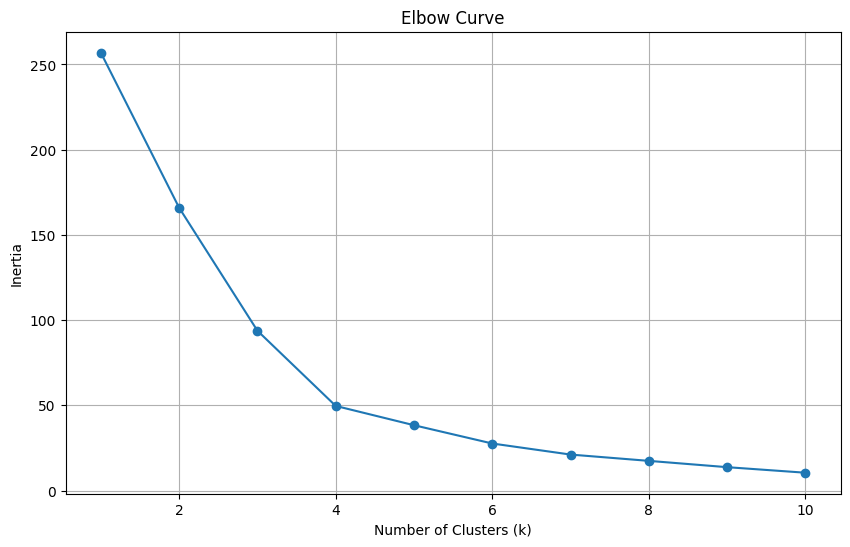

In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_pca["Number of Clusters (k)"], elbow_df_pca["Inertia"], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [26]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values.
print(clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [28]:
# Create a copy of the DataFrame with the PCA data
df_pca_clusters = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_clusters['Cluster'] = clusters

# Display sample data
df_pca_clusters.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


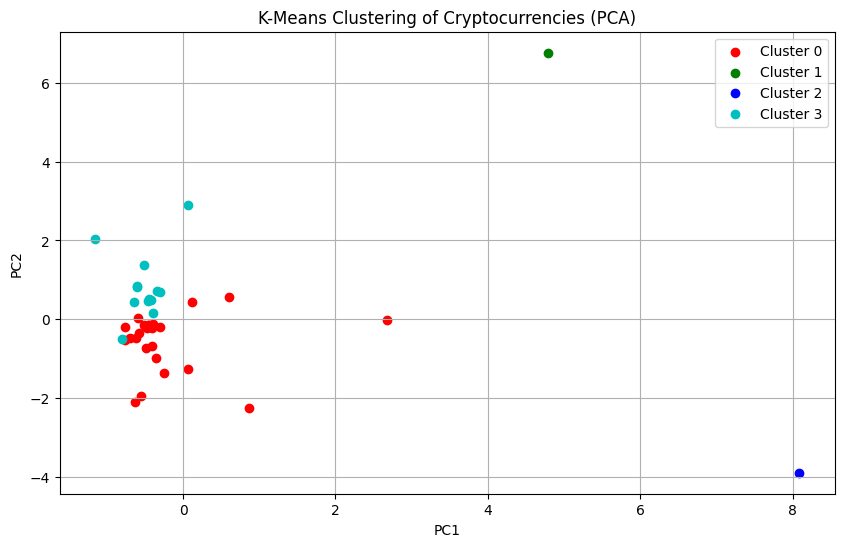

In [29]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
plt.figure(figsize=(10, 6))
for cluster_id in range(4):
    cluster_data = df_pca_clusters[df_pca_clusters['Cluster'] == cluster_id]
    plt.scatter(cluster_data['PC1'],
                cluster_data['PC2'],
                c=colors[cluster_id],
                label=f'Cluster {cluster_id}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering of Cryptocurrencies (PCA)')
plt.legend()
plt.grid(True)
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

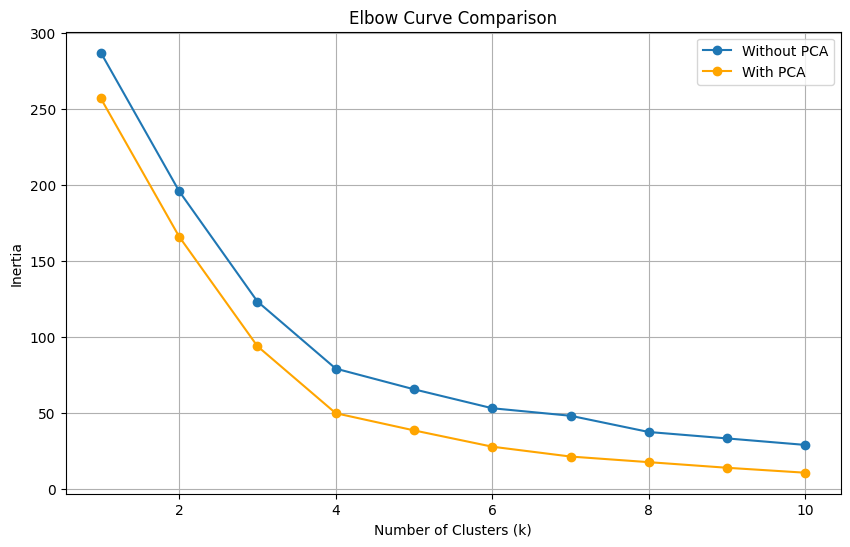

In [30]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["Number of Clusters (k)"], elbow_df["Inertia"], marker='o', label='Without PCA')
plt.plot(elbow_df_pca["Number of Clusters (k)"], elbow_df_pca["Inertia"], marker='o', color='orange', label='With PCA')
plt.title('Elbow Curve Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.legend()
plt.show()

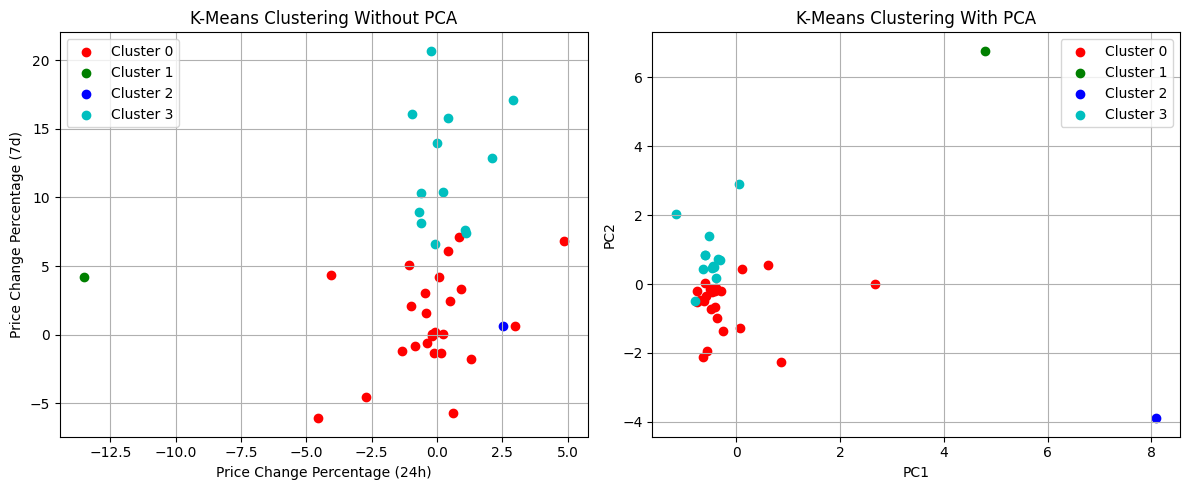

In [31]:
# Composite plot to contrast the clusters
# Define colors for each cluster
colors = ['r', 'g', 'b', 'c']
plt.figure(figsize=(12, 5))

# Plot clusters without PCA
plt.subplot(1, 2, 1)
for cluster_id in range(4):  # Adjusted to range(4)
    cluster_data = df_market_data_clusters[df_market_data_clusters['Cluster'] == cluster_id]
    plt.scatter(cluster_data['price_change_percentage_24h'],
                cluster_data['price_change_percentage_7d'],
                c=colors[cluster_id],
                label=f'Cluster {cluster_id}')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.title('K-Means Clustering Without PCA')
plt.legend()
plt.grid(True)

# Plot clusters with PCA
plt.subplot(1, 2, 2)
for cluster_id in range(4):  # Adjusted to range(4)
    cluster_data = df_pca_clusters[df_pca_clusters['Cluster'] == cluster_id]
    plt.scatter(cluster_data['PC1'],
                cluster_data['PC2'],
                c=colors[cluster_id],
                label=f'Cluster {cluster_id}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering With PCA')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

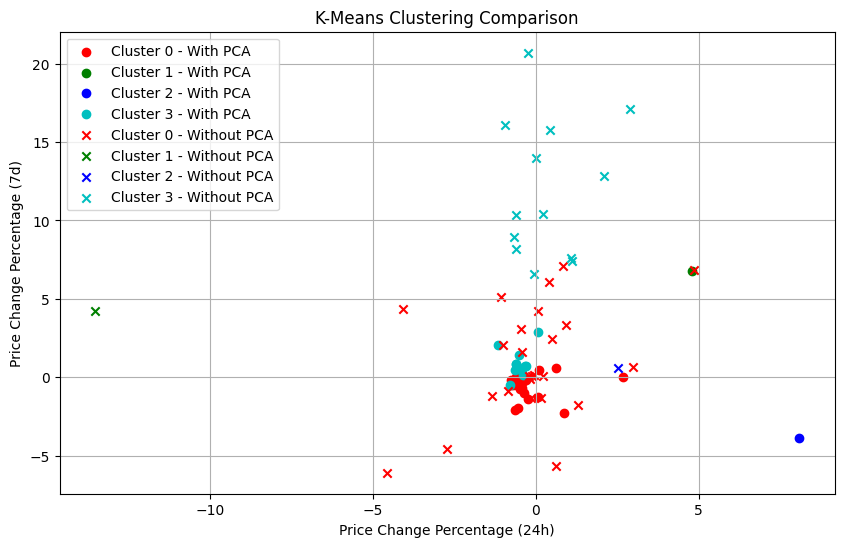

In [32]:
# Combine the dataframes
combined_df = pd.concat([df_market_data_clusters, df_pca_clusters], keys=['Without PCA', 'With PCA'])

# Create a scatter plot for both sets of data
plt.figure(figsize=(10, 6))

# Plot clusters without PCA
for label, df in combined_df.groupby(level=0):
    if label == 'Without PCA':
        for cluster_id in range(4):
            cluster_data = df[df['Cluster'] == cluster_id]
            plt.scatter(cluster_data['price_change_percentage_24h'],
                        cluster_data['price_change_percentage_7d'],
                        color=colors[cluster_id],
                        marker='x',  # Use circle marker for without PCA
                        label=f'Cluster {cluster_id} - {label}')
    else:
        for cluster_id in range(4):
            cluster_data = df[df['Cluster'] == cluster_id]
            plt.scatter(cluster_data['PC1'],
                        cluster_data['PC2'],
                        color=colors[cluster_id],
                        marker='o',  # Use square marker for with PCA
                        label=f'Cluster {cluster_id} - {label}')
plt.xlabel('PC1' if label == 'With PCA' else 'Price Change Percentage (24h)')
plt.ylabel('PC2' if label == 'With PCA' else 'Price Change Percentage (7d)')
plt.title('K-Means Clustering Comparison')
plt.legend()
plt.grid(True)
plt.show()


#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**
*   Reduced Dimensionality: By using fewer features, PCA reduces the dimensionality of the data, which can lead to simpler models and lower computational costs. This reduction in dimensionality helps to visualize the data in lower-dimensional space while preserving most of the variance.
*   Improved Interpretability: With fewer features, the resulting clusters may be more easily interpretable as they are based on a smaller subset of the original features. This can help to identify key patterns or relationships within the data.
*   Enhanced Clustering Performance: In some cases, reducing dimensionality can improve clustering performance by focusing on the most important features and reducing noise or irrelevant information. This can lead to more accurate and meaningful clusters.





